# Introduction to PyTorch
### Modified by Thomas McDonald, 25th October 2021
#### 28th October 2020 by Juan-Jose Giraldo and Mauricio A Alvarez

#Tensors


In [6]:
import torch

y = torch.rand([2])
print("Tensor 1D presents one index", "with shape", y.shape, ":\n", y)

y = torch.rand([2,3])
print("Tensor 2D presents two indexes", "with shape", y.shape, ":\n", y)

Tensor 1D presents one index with shape torch.Size([2]) :
 tensor([0.2790, 0.3298])
Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.1032, 0.9819, 0.4295],
        [0.2178, 0.1582, 0.4195]])


In [4]:
x = torch.tensor([4.0, 5.0], dtype=torch.float32)
y = torch.tensor([2.0, 3.0], dtype=torch.float32)

print(x * y)

tensor([ 8., 15.])


In [5]:
x_zeros = torch.zeros([3, 4])
print("x_zeros:", x_zeros, "with shape", x_zeros.shape, "\n")

x_ones = torch.ones([2, 6])
print("x_ones:", x_ones, "with shape", x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


In [7]:
y = torch.ones([3, 2])
y_reshaped = y.view(6, 1)
print(y_reshaped)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [8]:
import numpy as np

#tensor_torch to tensor numpy
tensor_torch = torch.ones(3, 4)
tensor_numpy = (tensor_torch.numpy())
print("Array in numpy form with shape", tensor_numpy.shape, ":\n", tensor_numpy)

# tensor_numpy to tensor_torch
tensor_np = np.random.randn(5, 8)
tensor_numpy_to_torch = torch.from_numpy(tensor_np)
print("\nArray from Numpy to Torch with shape",
      tensor_numpy_to_torch.shape,
      ":\n",
      tensor_numpy_to_torch,
)

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[ 0.9830,  1.3277, -0.8722, -1.2659,  1.4590,  0.8350,  1.5538,  0.4687],
        [-0.6802, -1.5715,  1.7015, -0.7809, -0.7821,  0.4312,  1.2282,  1.8267],
        [-1.7038,  0.3093, -0.3349,  0.6741, -1.1519, -0.7682, -1.5026, -0.9485],
        [-0.3398, -0.0329,  1.6528, -1.1756, -0.1154,  0.5148,  0.0200,  0.0490],
        [ 0.9520,  0.6144,  0.7618, -0.6923, -0.2568,  0.3789,  0.9268,  0.5412]],
       dtype=torch.float64)


Automatic Differentiation


In [9]:
x = torch.rand(3, requires_grad=True)
print(x)

tensor([0.4629, 0.7003, 0.2672], requires_grad=True)


In [10]:
x = torch.tensor([2.0])
x.requires_grad_(True)
y = x ** 2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [15]:
#y.backward() # dy/dx
print("PyTorch gradient:", x.grad)

#compare with the analytical gradient of y = x**2 + 5
with torch.no_grad():
  dy_dx = 2 * x
print("Analytical gradient:", dy_dx)

PyTorch gradient: tensor([4.])
Analytical gradient: tensor([4.])


In [5]:
#evaluate a vector w = [w_1, ... w_d],to compute another vector g.T gi = wi^2 +5
w = torch.tensor([1.0, 2.0, 3.0])
w.requires_grad_(True)

g = w ** 2 + 5

#the values [1.0, 1.0, 1.0] are multiplied by the gradient g.backward(vect);
vect = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float32)
g.backward(vect)
print(w.grad)

tensor([2., 4., 6.])


In [7]:
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

for i in range(3):
  g = w**2+5
  g.backward(torch.ones_like(w))
  print(w.grad)
 # w.grad.zero_()

tensor([2., 4., 6.])
tensor([ 4.,  8., 12.])
tensor([ 6., 12., 18.])


In [19]:
#Question 1
x = torch.tensor([2.0])
x.requires_grad_(True)

y = torch.exp(- (x**2) - 2*x - torch.sin(x))

y.backward()
print("PyTorch gradient:", x.grad)

with torch.no_grad():
  dy_dx = dy_dx = (
        torch.exp(-2 * x) * torch.exp(-torch.sin(x)) * (-2 * x * torch.exp(-(x ** 2)))
        + torch.exp(-(x ** 2)) * torch.exp(-torch.sin(x)) * (-2 * torch.exp(-2 * x))
        + torch.exp(-(x ** 2))
        * torch.exp(-2 * x)
        * (-torch.cos(x) * torch.exp(-torch.sin(x)))
    )
print("Analytical gradient:", dy_dx)

PyTorch gradient: tensor([-0.0008])
Analytical gradient: tensor([-0.0008])


In [20]:
#Linear Regression Basic Example
#y = wx + b
n_data = 100
x = torch.rand(n_data)
true_w = 1.5
true_bias = 1.0

y = true_w * x + true_bias + 0.05 * torch.randn(n_data)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
bias = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)


In [3]:
def model_prediction(x, w, bias):
  return w * x + bias

def loss_function(y, y_pred):
  return ((y_pred - y)**2).mean() # Mean Squared Error (MSE)

In [21]:
max_n_iter = 500
step_size = 0.1

for n_iter in range(max_n_iter):

  #Evaluate the prediction and the loss
  y_approx = model_prediction(x, w, bias)
  my_loss = loss_function(y, y_approx)

  my_loss.backward()

  with torch.no_grad():
    ##!!!we can't code w = w - (step_size*w.grad) here,it will change
    ## the ram position of w, and clean up the graident of w
    w -= (step_size * w.grad)
    bias -=step_size * bias.grad

  #Zero the gradients to avoid acummulation
  w.grad.zero_()
  bias.grad.zero_()

  #We print the loss, and the parameters values every 50 iterations
  if n_iter % 50 == 0:
    print(
        f"Interation = {n_iter+1}, Loss = {my_loss:.8f}, w ={w:.3f}, bias = {bias:.3f}"
    )

print(f"Interation = {n_iter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}")

Interation = 1, Loss = 3.31468868, w =0.206, bias = 0.353
Interation = 51, Loss = 0.01448638, w =1.135, bias = 1.201
Interation = 101, Loss = 0.00542440, w =1.317, bias = 1.102
Interation = 151, Loss = 0.00311240, w =1.408, bias = 1.052
Interation = 201, Loss = 0.00252252, w =1.455, bias = 1.026
Interation = 251, Loss = 0.00237203, w =1.478, bias = 1.014
Interation = 301, Loss = 0.00233363, w =1.490, bias = 1.007
Interation = 351, Loss = 0.00232384, w =1.496, bias = 1.004
Interation = 401, Loss = 0.00232134, w =1.499, bias = 1.002
Interation = 451, Loss = 0.00232070, w =1.500, bias = 1.001
Interation = 500, Loss = 0.00232054, w = 1.501, bias = 1.001


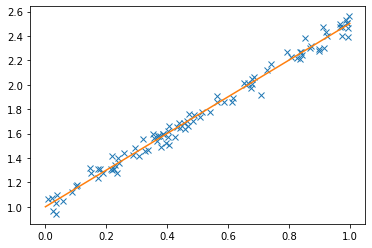

In [22]:
#Plot the result
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(x, y, "x")
x_test= torch.linspace(0, 1, 10)
with torch.no_grad():
  y_pred = model_prediction(x_test, w, bias)
plt.plot(x_test, y_pred)
plt.show()

In [23]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request

urllib.request.urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    "./winequality-red.csv",
)

('./winequality-red.csv', <http.client.HTTPMessage at 0x7fd8eda58710>)

In [25]:
import numpy as np

wine_np = np.loadtxt("./winequality-red.csv", dtype=np.float32, delimiter=";", skiprows=1)
wine_torch = torch.from_numpy(wine_np)
wine_torch

tensor([[ 7.4000,  0.7000,  0.0000,  ...,  0.5600,  9.4000,  5.0000],
        [ 7.8000,  0.8800,  0.0000,  ...,  0.6800,  9.8000,  5.0000],
        [ 7.8000,  0.7600,  0.0400,  ...,  0.6500,  9.8000,  5.0000],
        ...,
        [ 6.3000,  0.5100,  0.1300,  ...,  0.7500, 11.0000,  6.0000],
        [ 5.9000,  0.6450,  0.1200,  ...,  0.7100, 10.2000,  5.0000],
        [ 6.0000,  0.3100,  0.4700,  ...,  0.6600, 11.0000,  6.0000]])

In [26]:
import urllib.request

urllib.request.urlretrieve(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv",
    "./SeoulBikeData.csv",
)

('./SeoulBikeData.csv', <http.client.HTTPMessage at 0x7fd8ec99c490>)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

bike_sharing_data = pd.read_csv("SeoulBikeData.csv", encoding="unicode_escape")
bike_sharing_data = bike_sharing_data.drop("Date", axis=1)

for col in ["Rented Bike Count", "Hour", "Humidity(%)", "Visibility (10m)"]:
    bike_sharing_data[col] = bike_sharing_data[col].astype("float64")

attributes_cat = ["Seasons", "Holiday", "Functioning Day"]
attributes_num = [
    "Hour",
    "Temperature(°C)",
    "Humidity(%)",
    "Wind speed (m/s)",
    "Visibility (10m)",
    "Dew point temperature(°C)",
    "Solar Radiation (MJ/m2)",
    "Rainfall(mm)",
    "Snowfall (cm)",
]

# We split our dataset for training and testing
bs_train_set, bs_test_set = train_test_split(
    bike_sharing_data, test_size=0.15, random_state=42
)

full_transform = ColumnTransformer(
    [
        ("num", StandardScaler(), attributes_num),
        ("cat", OneHotEncoder(), attributes_cat),
    ]
)

# We separate the features from the labels
bs_train_set_attributes = bs_train_set.drop("Rented Bike Count", axis=1)
bs_test_set_attributes = bs_test_set.drop("Rented Bike Count", axis=1)
bs_train_set_labels = bs_train_set["Rented Bike Count"]
bs_test_set_labels = bs_test_set["Rented Bike Count"]

In [29]:
print(bs_test_set_labels)
print(bs_test_set_labels.values)

print(bs_train_set_attributes)
print(bs_train_set_attributes.values)

6056    1728.0
5556     822.0
5990     658.0
7674    2716.0
3319    1083.0
         ...  
6224    1918.0
4295    1247.0
2770     415.0
1244     258.0
4607    1191.0
Name: Rented Bike Count, Length: 1314, dtype: float64
[1728.  822.  658. ...  415.  258. 1191.]
      Hour  Temperature(°C)  Humidity(%)  ...  Seasons     Holiday  Functioning Day
5852  20.0             34.5         62.0  ...   Summer  No Holiday              Yes
7568   8.0              6.0         64.0  ...   Autumn  No Holiday              Yes
5970  18.0             32.8         63.0  ...   Summer  No Holiday              Yes
6791  23.0             21.2         56.0  ...   Autumn  No Holiday              Yes
576    0.0             -0.6         64.0  ...   Winter     Holiday              Yes
...    ...              ...          ...  ...      ...         ...              ...
5734  22.0             29.9         74.0  ...   Summer  No Holiday              Yes
5191   7.0             23.5         90.0  ...   Summer  No Holiday 

In [31]:
bs_train_set_attributes_prepared = full_transform.fit_transform(bs_train_set_attributes)
bs_test_set_attributes_prepared = full_transform.transform(bs_test_set_attributes)

train_torch = torch.from_numpy(bs_train_set_attributes_prepared)

#The line below adds a feature vector of ones in order to allow the bias weight
#to be represented in a unique weight vector
train_torch = torch.cat((torch.ones([train_torch.shape[0], 1], dtype=torch.float64), train_torch),1)
test_torch = torch.from_numpy(bs_test_set_attributes_prepared)

test_torch = torch.cat((torch.ones([test_torch.shape[0], 1], dtype=torch.float64), test_torch), 1)

train_label_torch = torch.from_numpy(bs_train_set_labels.values)
test_label_torch = torch.from_numpy(bs_test_set_labels.values)


In [36]:
print(test_label_torch)
print(test_torch)
print(bs_train_set_attributes)
print(bs_train_set_attributes_prepared)
print(train_torch.shape[0])
print(train_torch.shape[1])

tensor([1728.,  822.,  658.,  ...,  415.,  258., 1191.], dtype=torch.float64)
tensor([[ 1.0000, -0.5031,  1.1949,  ...,  1.0000,  0.0000,  1.0000],
        [ 1.0000,  0.0753,  1.6478,  ...,  1.0000,  0.0000,  1.0000],
        [ 1.0000,  0.3645,  1.7652,  ...,  1.0000,  0.0000,  1.0000],
        ...,
        [ 1.0000, -0.2139, -0.2475,  ...,  1.0000,  0.0000,  1.0000],
        [ 1.0000,  1.2320, -1.0609,  ...,  1.0000,  0.0000,  1.0000],
        [ 1.0000,  1.6658,  0.6666,  ...,  1.0000,  0.0000,  1.0000]],
       dtype=torch.float64)
      Hour  Temperature(°C)  Humidity(%)  ...  Seasons     Holiday  Functioning Day
5852  20.0             34.5         62.0  ...   Summer  No Holiday              Yes
7568   8.0              6.0         64.0  ...   Autumn  No Holiday              Yes
5970  18.0             32.8         63.0  ...   Summer  No Holiday              Yes
6791  23.0             21.2         56.0  ...   Autumn  No Holiday              Yes
576    0.0             -0.6         64.0

In [37]:
#We create the vector of weights to be optimised in the linear regression model
dim = train_torch.shape[1]
w = torch.randn([dim, 1], dtype=torch.float64)
w.requires_grad_(True)

def model_prediction_lr(x, w):
  #matmul(x,w) = x @ w, mul(x,w) = x * w
  return torch.matmul(x,w)

def loss_function_lr(y, y_pred):
  return ((y_pred - y) ** 2).mean()

In [49]:
max_n_iter = 1000
step_size = 0.000001

for n_iter in range(max_n_iter):
  y_pred = model_prediction_lr(train_torch, w)
  my_loss = loss_function_lr(train_label_torch, y_pred)

  my_loss.backward()

  with torch.no_grad():
    w -=(step_size * w.grad)
  
  w.grad.zero_()

  if n_iter % 50 == 0:
    print(
        f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}"
    )

print(
        f"Iteration = {n_iter+1}, Loss = {my_loss:.8f}"
    )

Iteration = 1, Loss = 416503.29065965
Iteration = 51, Loss = 416503.29065791
Iteration = 101, Loss = 416503.29065616
Iteration = 151, Loss = 416503.29065441
Iteration = 201, Loss = 416503.29065267
Iteration = 251, Loss = 416503.29065092
Iteration = 301, Loss = 416503.29064918
Iteration = 351, Loss = 416503.29064743
Iteration = 401, Loss = 416503.29064568
Iteration = 451, Loss = 416503.29064394
Iteration = 501, Loss = 416503.29064219
Iteration = 551, Loss = 416503.29064045
Iteration = 601, Loss = 416503.29063870
Iteration = 651, Loss = 416503.29063696
Iteration = 701, Loss = 416503.29063521
Iteration = 751, Loss = 416503.29063346
Iteration = 801, Loss = 416503.29063172
Iteration = 851, Loss = 416503.29062997
Iteration = 901, Loss = 416503.29062823
Iteration = 951, Loss = 416503.29062648
Iteration = 1000, Loss = 416503.29062477


In [51]:
y_pred_test = model_prediction_lr(test_torch, w)
MSE_test = loss_function_lr(test_label_torch, y_pred_test)
print(
    "The Root Mean Squared Error over the test set is:",
    np.sqrt(MSE_test.detach().numpy()),
)

The Root Mean Squared Error over the test set is: 642.6415782170296


In [59]:
#Question 2

jim = train_torch.shape[1]
w = torch.zeros([jim, 1], dtype=torch.float64)
w.requires_grad_(True)

def model_prediction_lr_q2(x, w):
  return torch.exp(torch.matmul(x, w))

def loss_function_lr_q2(y, y_pred):
  return ((y_pred - y) ** 2).mean()

max_n_iter = 1000
step_size = 0.000001
for n_iter in range(max_n_iter):
  y_approx = model_prediction_lr_q2(train_torch, w)
  my_loss = loss_function_lr(train_label_torch, y_approx)

  my_loss.backward()

  with torch.no_grad():
    w -= (step_size * w.grad)

  w.grad.zero_()

  if n_iter % 20 ==0 or n_iter == max_n_iter - 1:
    print(f"Iterotion = {n_iter+1}, Loss = {my_loss:.8f}")

Iterotion = 1, Loss = 913361.08246038
Iterotion = 21, Loss = 913226.76417907
Iterotion = 41, Loss = 913064.00528737
Iterotion = 61, Loss = 912862.69877708
Iterotion = 81, Loss = 912607.30833449
Iterotion = 101, Loss = 912272.66140669
Iterotion = 121, Loss = 911815.11938133
Iterotion = 141, Loss = 911151.88219921
Iterotion = 161, Loss = 910104.51806454
Iterotion = 181, Loss = 908205.80859799
Iterotion = 201, Loss = 903729.04583934
Iterotion = 221, Loss = 881394.91981947
Iterotion = 241, Loss = 475479.28927359
Iterotion = 261, Loss = 482250.07505938
Iterotion = 281, Loss = 454625.36239110
Iterotion = 301, Loss = 537212.91533062
Iterotion = 321, Loss = 452240.14107909
Iterotion = 341, Loss = 450588.39970749
Iterotion = 361, Loss = 453331.97574422
Iterotion = 381, Loss = 438707.57712215
Iterotion = 401, Loss = 463715.82033191
Iterotion = 421, Loss = 464525.80558762
Iterotion = 441, Loss = 441067.74671164
Iterotion = 461, Loss = 425308.47297023
Iterotion = 481, Loss = 445322.08242790
Iterot

In [62]:
y_pred_test_q2 = model_prediction_lr_q2(test_torch, w)
MSE_test_q2 = loss_function_lr_q2(test_label_torch, y_pred_test_q2)
print("The Root Mean Squared Error over the test set is :",
      np.sqrt(MSE_test_q2.detach().numpy()),
)

The Root Mean Squared Error over the test set is : 664.0261980795752


In [60]:
print(w)

tensor([[ 2.8254],
        [ 0.0190],
        [-0.0332],
        [-0.0476],
        [ 0.0201],
        [ 0.0187],
        [ 0.0927],
        [ 0.0278],
        [-0.0154],
        [-0.0182],
        [ 0.7215],
        [ 0.7206],
        [ 0.6797],
        [ 0.7036],
        [ 1.4496],
        [ 1.3757],
        [ 1.4549],
        [ 1.3704]], dtype=torch.float64, requires_grad=True)